# DengAI challenge

## Problem descriptions 

- We are given historical data of weekly Dengue cases reported for two cities San Juan and Iquitos in South America. Dengue is a mosquito-borne tropical disease causes by dengue virus. It is carried by mosquitoes. Seasonal change of climate also appears to be correlated with increased dynamics of virus transmission. The Data also contains climate information of these two cities from different sources such as information about climates from NOAA- GHCN daily, NOAA-NCEP, and NDVI. Here, we develop a machine learning model to predict weekly spread of Dengue cases for two cities. 


### Columns description
 City and date indicators
- city – City abbreviations: sj for San Juan and iq for Iquitos
- week_start_date – Date given in yyyy-mm-dd format
#### NOAA's GHCN daily climate data weather station measurements
(GHCN (Global Historical Climatology Network)-Daily is an integrated database of daily climate summaries from land surface stations across the globe. Like its monthly counterpart (GHCN-Monthly) , GHCN-Daily is comprised of daily climate records from numerous sources that have been integrated and subjected to a common suite of quality assurance reviews)
- station_max_temp_c – Maximum temperature
- station_min_temp_c – Minimum temperature
- station_avg_temp_c – Average temperature
- station_precip_mm – Total precipitation
- station_diur_temp_rng_c – Diurnal temperature range( it is the difference between the daily maximum and minimum temperature)
- PERSIANN satellite precipitation measurements (0.25x0.25 degree scale)
- precipitation_amt_mm – Total precipitation
#### NOAA's NCEP Climate Forecast System Reanalysis measurements (0.5x0.5 degree scale)
(The NCEP Climate Forecast System Reanalysis (CFSR) was designed and executed as a global, high-resolution, coupled atmosphere-ocean-land surface-sea ice system to provide the best estimate of the state of these coupled domains over the 32-year period of record from January 1979 to March 2011)
- reanalysis_sat_precip_amt_mm – Total precipitation
- reanalysis_dew_point_temp_k – Mean dew point temperature
- reanalysis_air_temp_k – Mean air temperature
- reanalysis_relative_humidity_percent – Mean relative humidity
- reanalysis_specific_humidity_g_per_kg – Mean specific humidity
- reanalysis_precip_amt_kg_per_m2 – Total precipitation
- reanalysis_max_air_temp_k – Maximum air temperature
- reanalysis_min_air_temp_k – Minimum air temperature
- reanalysis_avg_temp_k – Average air temperature
- reanalysis_tdtr_k – Diurnal temperature range
#### Satellite vegetation - Normalized difference vegetation index (NDVI) - NOAA's CDR Normalized Difference Vegetation -- Index (0.5x0.5 degree scale) measurements
(The normalized difference vegetation index (NDVI) is a simple graphical indicator that can be used to analyze remote sensing measurements, typically, but not necessarily, from a space platform, and assess whether the target being observed contains live green vegetation or not. Normalized Difference Vegetation Index (NDVI) quantifies vegetation by measuring the difference between near-infrared (which vegetation strongly reflects) and red light (which vegetation absorbs).)
- ndvi_se – Pixel southeast of city centroid
- ndvi_sw – Pixel southwest of city centroid
- ndvi_ne – Pixel northeast of city centroid
- ndvi_nw – Pixel northwest of city centroid


In [1]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
plt.style.use('ggplot')
%matplotlib inline

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR, LinearSVR
from xgboost import XGBClassifier,XGBRegressor
from xgboost import plot_importance
from matplotlib import pyplot


import warnings
warnings.filterwarnings("ignore")

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# EDA

- The data is given for two city sj (San Juan) and iq (Iquitos) for Dengue case reported over the time. The main type of data are (a) temperature (b) precipitation, rain or snow information (c) humidity (d) vegetation data.

In [2]:
pwd

'/Users/akshay/Downloads/ADP_challange/DengAI'

In [4]:
# read data
feature=pd.read_csv('DengAI_Predicting_Disease_Spread_-_Training_Data_Features.csv')
labels=pd.read_csv('DengAI_Predicting_Disease_Spread_-_Training_Data_Labels.csv')
testdata=pd.read_csv('DengAI_Predicting_Disease_Spread_-_Test_Data_Features.csv')
# join the labels
df = pd.merge(feature, labels, how='left', on=['city', 'year','weekofyear'])

In [5]:
print(feature.shape)
print(labels.shape)
print(df.shape)

(1456, 24)
(1456, 4)
(1456, 25)


In [6]:
df.head()

city  year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
0   sj  1990          18      1990-04-30  0.122600  0.103725  0.198483   
1   sj  1990          19      1990-05-07  0.169900  0.142175  0.162357   
2   sj  1990          20      1990-05-14  0.032250  0.172967  0.157200   
3   sj  1990          21      1990-05-21  0.128633  0.245067  0.227557   
4   sj  1990          22      1990-05-28  0.196200  0.262200  0.251200   

    ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  \
0  0.177617                 12.42             297.572857   
1  0.155486                 22.82             298.211429   
2  0.170843                 34.54             298.781429   
3  0.235886                 15.36             298.987143   
4  0.247340                  7.52             299.518571   

   reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
0             297.742857                   292.414286   
1             298.442857                   293.951429   
2             298.878571                   295.434286   
3             299.228571                   295.310000   
4             299.664286                   295.821429   

   reanalysis_max_air_temp_k  reanalysis_min_air_temp_k  \
0                      299.8                      295.9   
1                      300.9                      296.4   
2                      300.5                      297.3   
3                      301.4                      297.0   
4                      301.9                      297.5   

   reanalysis_precip_amt_kg_per_m2  reanalysis_relative_humidity_percent  \
0                            32.00                             73.365714   
1                            17.94                             77.368571   
2                            26.10                             82.052857   
3                            13.90                             80.337143   
4                            12.20                             80.460000   

   reanalysis_sat_precip_amt_mm  reanalysis_specific_humidity_g_per_kg  \
0                         12.42                              14.012857   
1                         22.82                              15.372857   
2                         34.54                              16.848571   
3                         15.36                              16.672857   
4                          7.52                              17.210000   

   reanalysis_tdtr_k  station_avg_temp_c  station_diur_temp_rng_c  \
0           2.628571           25.442857                 6.900000   
1           2.371429           26.714286                 6.371429   
2           2.300000           26.714286                 6.485714   
3           2.428571           27.471429                 6.771429   
4           3.014286           28.942857                 9.371429   

   station_max_temp_c  station_min_temp_c  station_precip_mm  total_cases  
0                29.4                20.0               16.0            4  
1                31.7                22.2                8.6            5  
2                32.2                22.8               41.4            4  
3                33.3                23.3                4.0            3  
4                35.0                23.9                5.8            6

In [7]:
col_name=df.columns
col_name

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases'],
      dtype='object')

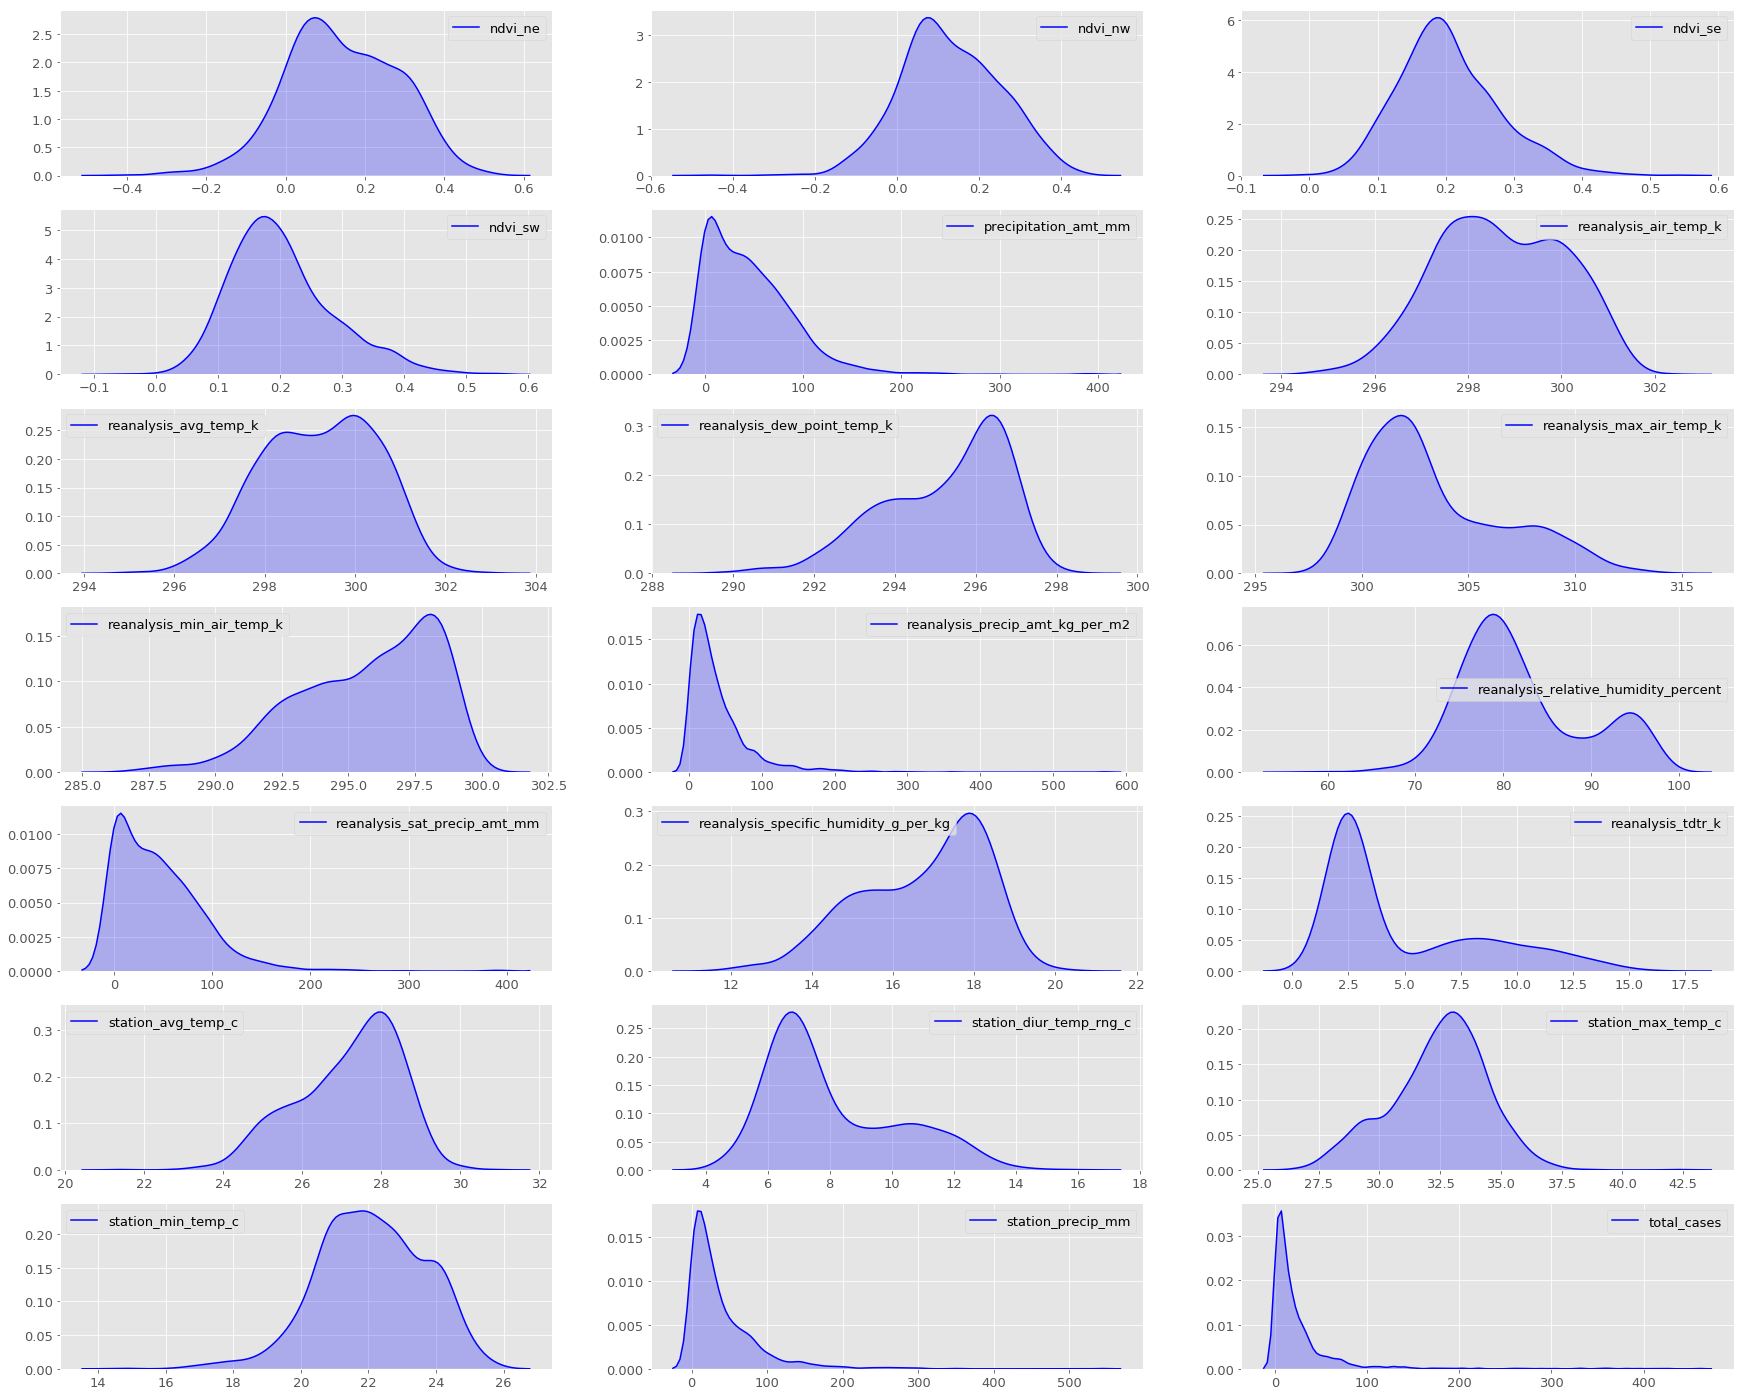

In [8]:
# distribution plot of the columns 
plt.rc("font", size=13)
plt.rcParams["figure.figsize"] = [30,25]
alpha=0.6
for i,col in enumerate(col_name[4:]):
    plt.subplot(7, 3,i+1)
    sns.kdeplot(df[str(col)],shade=True, color="b")

- here, we look at the distribution of dependent and independent variables to check if the data follows normal distribution, which is required for a regression model. The set of graphs above shows that most of variables are skewed and not normally distributed. 

In [9]:
# check null values 
df.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

In [10]:
# use forward fill on the NaNs - good since it's a timeseries
df.fillna(method='ffill', inplace=True)
testdata.fillna(method='ffill', inplace=True)
#df.isna().sum()

In [11]:
# summary statistics 
df.describe()

year   weekofyear      ndvi_ne      ndvi_nw      ndvi_se  \
count  1456.000000  1456.000000  1456.000000  1456.000000  1456.000000   
mean   2001.031593    26.503434     0.131271     0.128068     0.202606   
std       5.408314    15.019437     0.138527     0.119561     0.074409   
min    1990.000000     1.000000    -0.406250    -0.456100    -0.015533   
25%    1997.000000    13.750000     0.039100     0.048250     0.152795   
50%    2002.000000    26.500000     0.113900     0.115926     0.195664   
75%    2005.000000    39.250000     0.232018     0.213429     0.247461   
max    2010.000000    53.000000     0.508357     0.454429     0.538314   

           ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  \
count  1456.000000           1456.000000            1456.000000   
mean      0.201987             45.686937             298.697965   
std       0.083592             43.779318               1.361950   
min      -0.063457              0.000000             294.635714   
25%       0.144455              9.655000             297.654643   
50%       0.190121             38.235000             298.646429   
75%       0.246775             70.227500             299.827500   
max       0.546017            390.600000             302.200000   

       reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
count            1456.000000                  1456.000000   
mean              299.221483                   295.245445   
std                 1.262676                     1.527527   
min               294.892857                   289.642857   
25%               298.257143                   294.119643   
50%               299.285714                   295.639286   
75%               300.207143                   296.460000   
max               302.928571                   298.450000   

       reanalysis_max_air_temp_k  reanalysis_min_air_temp_k  \
count                1456.000000                1456.000000   
mean                  303.419505                 295.719712   
std                     3.233030                   2.559398   
min                   297.800000                 286.900000   
25%                   301.000000                 293.900000   
50%                   302.400000                 296.200000   
75%                   305.500000                 297.900000   
max                   314.000000                 299.900000   

       reanalysis_precip_amt_kg_per_m2  reanalysis_relative_humidity_percent  \
count                      1456.000000                           1456.000000   
mean                         40.111635                             82.176203   
std                          43.329174                              7.161016   
min                           0.000000                             57.787143   
25%                          13.085000                             77.185714   
50%                          27.245000                             80.301429   
75%                          52.200000                             86.406429   
max                         570.500000                             98.610000   

       reanalysis_sat_precip_amt_mm  reanalysis_specific_humidity_g_per_kg  \
count                   1456.000000                            1456.000000   
mean                      45.686937                              16.745565   
std                       43.779318                               1.542276   
min                        0.000000                              11.715714   
25%                        9.655000                              15.560000   
50%                       38.235000                              17.087143   
75%                       70.227500                              17.977500   
max                      390.600000                              20.461429   

       reanalysis_tdtr_k  station_avg_temp_c  station_diur_temp_rng_c  \
count        1456.000000         1456.000000              1456.000000   
mean            4.898656           27.180313           

In [12]:
# check correlation between variables 
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG', 'coolwarm' are other good diverging colormaps

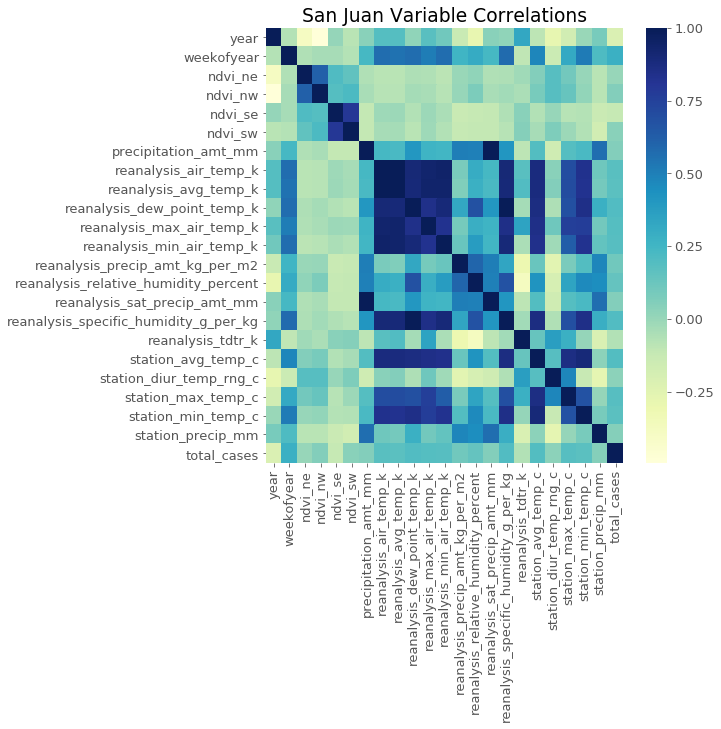

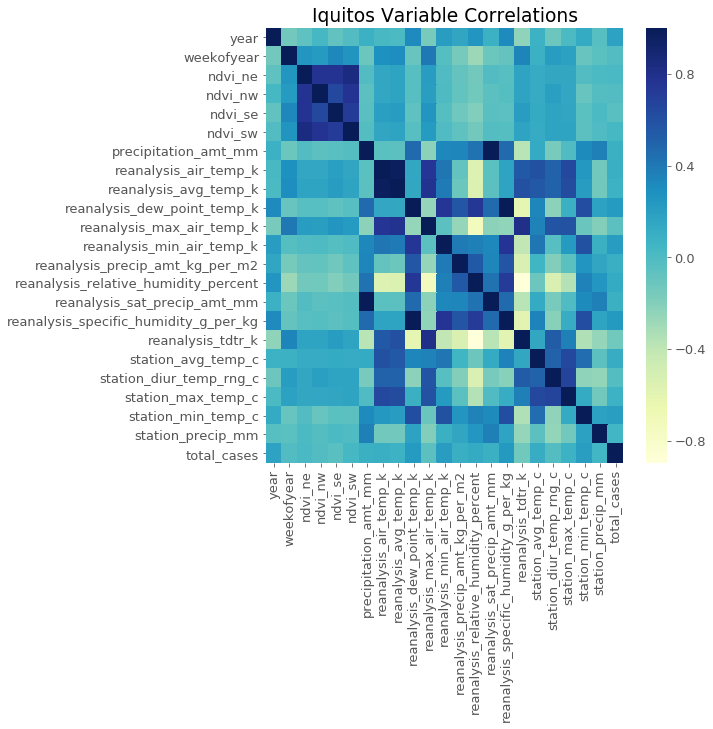

In [13]:
# correlation between variables for both cities separately 
# Separate data for San Juan and Iquitos cities
sj_df = df.loc[df.city=='sj']
iq_df = df.loc[df.city=='iq'] 

plt.rcParams["figure.figsize"] = [8,8]
sns.heatmap(sj_df.corr(),cmap="YlGnBu")
plt.title('San Juan Variable Correlations')
plt.show()

#plt.rcParams["figure.figsize"] = [8,8]
sns.heatmap(iq_df.corr(),cmap="YlGnBu")
plt.title('Iquitos Variable Correlations')
plt.show()

- From above overall correlation plot we see that some variables such as different tempreture measures and different vegitation are correlated. Also, we can notice that none of the variable is correlated with prediction variable( total cases).
- Also, different sets of variables are correlated in each correlation plot of two cities. For city of San juan, temperature variables are highly correlated with one another while for city of Iquitos, variables vegetation (NDVI) are highly correlated. 
- For my approch, considering limited time for this challenge, I am removing the variables which have correlation of more then 0.8. 
- Removing highly correlated variables helps to reduce variance and increase predictive power of linear regression.

### Distribution of total dengue cases in two cities 

[Text(0,0.5,'frequency')]

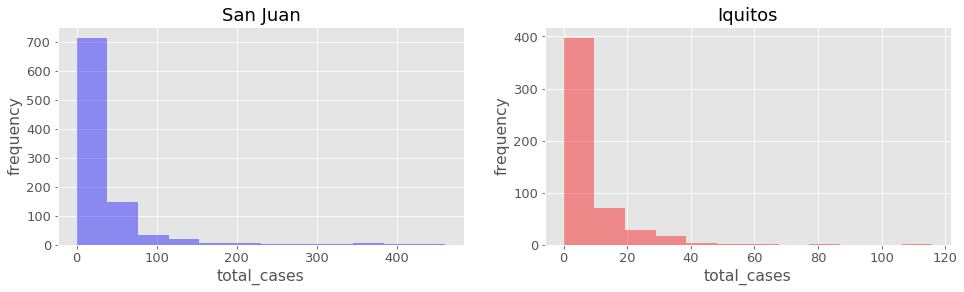

In [14]:
#distribution of total cases in two cities 

plt.rcParams["figure.figsize"] = [8,6]
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

sns.distplot(sj_df['total_cases'], bins=12 ,kde=False, label='sj',color='b',ax=ax1) # bin size represent total number of case in a week
ax1.set_title('San Juan', fontsize=18)
ax1.set(ylabel='frequency')

sns.distplot(iq_df['total_cases'],bins=12, kde=False,label='iq',color='r',ax=ax2)
ax2.set_title('Iquitos', fontsize=18)
ax2.set(ylabel='frequency')


##  Dengue cases reported over time 

In [15]:
!pwd

/Users/akshay/Downloads/ADP_challange/DengAI


In [16]:
# dengues case reported over time 
import plotly.graph_objects as go
import datetime

fig = go.Figure([go.Scatter(x=sj_df['week_start_date'], y=sj_df['total_cases'],line_color='deepskyblue')])
fig.update_layout(title="Historical Dengue cases in San Juan ", xaxis_title="Year", yaxis_title="Case reported")
fig.show()
fig.write_image("images/Historical_case_SanJuan.png")

fig = go.Figure([go.Scatter(x=iq_df['week_start_date'], y=iq_df['total_cases'],line_color='green')])
fig.update_layout(title="Historical Dengue cases in Iqitous  ", xaxis_title="Year", yaxis_title="Case reported")
fig.show()
fig.write_image("images/Historical_case_Iqitous.png")

- above plots indicate that there are no specific trend and regularity of the cases reported over time. Also, there is no specific correlation of cases reported between two cities. There are few spikes of cases that we can further analyze with other sources of data if available.

## Total dengue cases reported per year

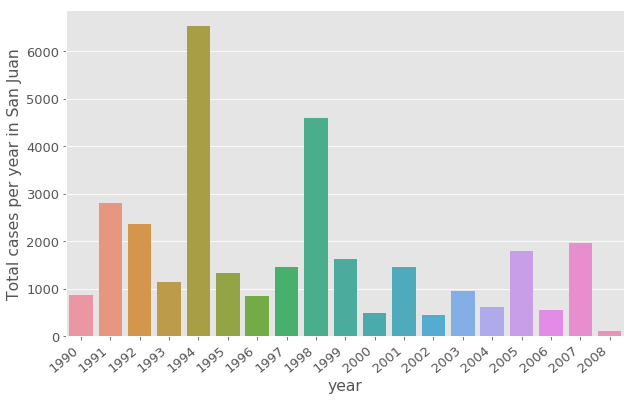

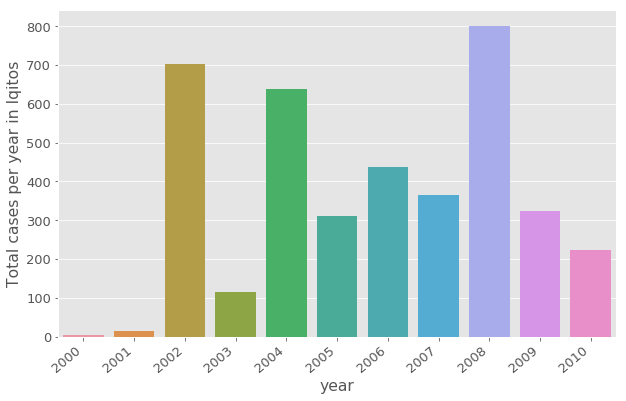

In [17]:
# total cases per year
plt.rcParams["figure.figsize"] = [10,6]

# San Juan
tmp = sj_df.groupby(['year']).total_cases.sum()
tmp=tmp.reset_index()
ax=sns.barplot(x='year', y='total_cases', data=tmp,)
ax.set(xlabel='year', ylabel='Total cases per year in San Juan')#ax1.set(ylabel='total_cases in San Juan')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

## Iquitos
tmp= iq_df.groupby(['year']).total_cases.sum()
tmp=tmp.reset_index()
ax=sns.barplot(x='year', y='total_cases', data=tmp)
ax.set(xlabel='year', ylabel='Total cases per year in Iqitos')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()


## Stationary check and decomposition of the time series 

### Time series ( Dengue cases over the time ) stationarity check

- TS is said to be stationary if its statistical properties such as mean and variance remain constant over time. TS models work on the assumption that the TS is stationary. 
 - (1) Plotting a Rolling moving average and moving variance and check its change over time 
 - (2) Dickey-Fuller Test - null hypothesis is that the TS is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary.

- Ref- https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/

In [18]:
# function to check statinarity using visual and Dickey_Fuller Test
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=3).mean()
    rolstd = pd.Series(timeseries).rolling(window=3).std()
    
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [19]:
tmp=df[['week_start_date','city','total_cases']]
tmp['week_start_date']=pd.to_datetime(tmp['week_start_date'])
tmp['month']=tmp['week_start_date'].dt.month # created month columns
tmp.index = tmp['week_start_date'] ### reset axis
del tmp['week_start_date']
sj=tmp[tmp['city']=='sj']
iq=tmp[tmp['city']=='iq']


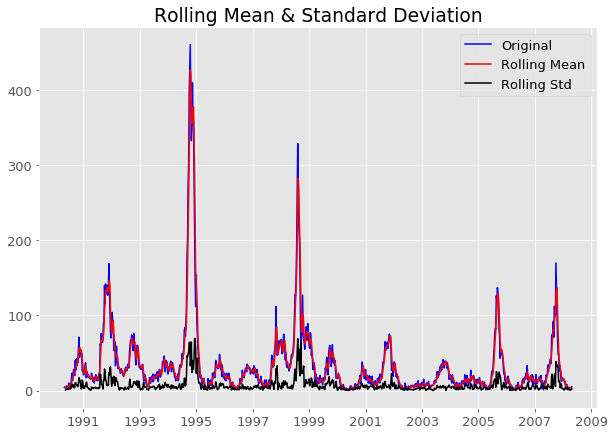

Results of Dickey-Fuller Test:
Test Statistic                -6.650078e+00
p-value                        5.147319e-09
#Lags Used                     9.000000e+00
Number of Observations Used    9.260000e+02
Critical Value (1%)           -3.437432e+00
Critical Value (5%)           -2.864666e+00
Critical Value (10%)          -2.568435e+00
dtype: float64


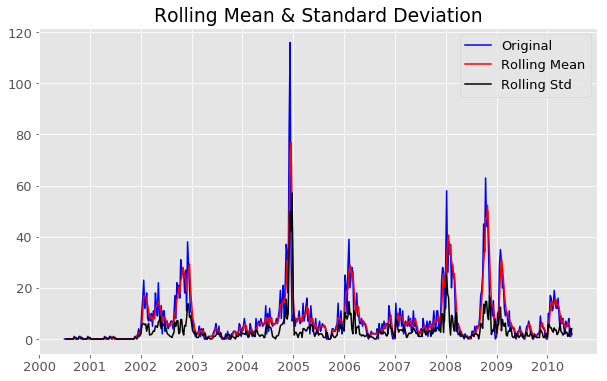

Results of Dickey-Fuller Test:
Test Statistic                -6.085429e+00
p-value                        1.067252e-07
#Lags Used                     4.000000e+00
Number of Observations Used    5.150000e+02
Critical Value (1%)           -3.443112e+00
Critical Value (5%)           -2.867168e+00
Critical Value (10%)          -2.569768e+00
dtype: float64


In [20]:
plt.figure(figsize=(10,7))
test_stationarity(sj['total_cases'])
test_stationarity(iq['total_cases'])


- Looking from plots and Dickey-Fuller test, total dengue cases reported for both cities are not stationary. Also, there is no clear increase or decrease patterns overs the years. It has short term increment and decrement withing year which could be possible due to weather cycle which might affects the spread of the Dengue in cities.


##  Decomposition of the time series using moving average

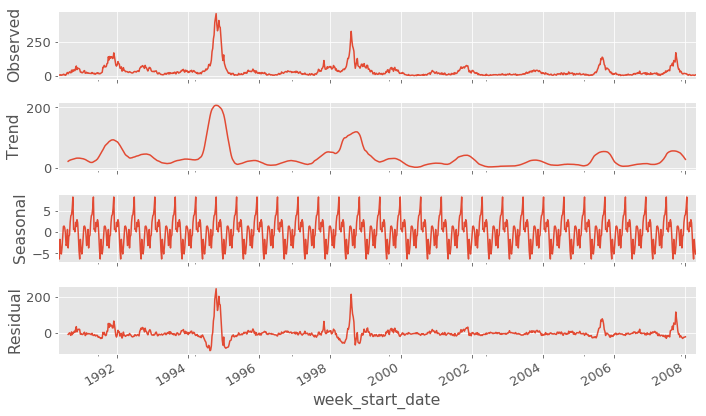

In [21]:
# decomposition of the time series using moving average
import statsmodels.api as sm
plt.figure(figsize=(10,5))
res = sm.tsa.seasonal_decompose(sj.total_cases, freq=30)
plt.show(block=False)
resplot = res.plot()

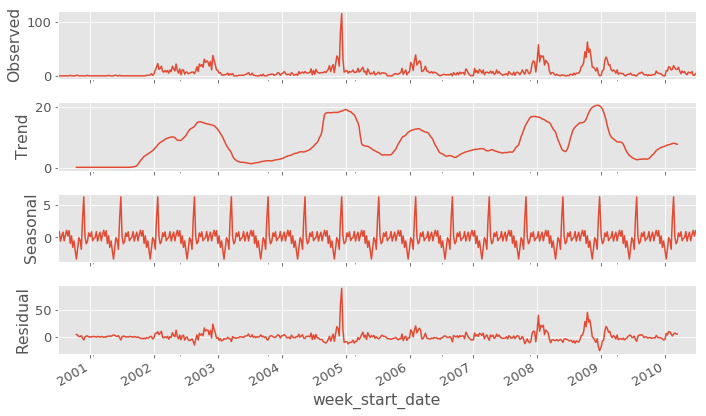

In [22]:
# decomposition of the time series using moving average
import statsmodels.api as sm
plt.figure(figsize=(10,5))
res = sm.tsa.seasonal_decompose(iq.total_cases, freq=30)
resplot = res.plot()

- decomposition plots show that there is no specific trend of dengue cases spread over time; and seasonal component shows regularity of patterns over time. 

# Data preprocessing and feature engineering

## some thoughts about why Dengue spread to the city

- Dengue virus spread through mosquito bite of people infected with dengue virus. 
#### Possible reasons of spread: 

- Increase of the number of mosquito in city
- Number of mosquitoes increases based on weather conditions 
- exposure to mosquito environment (conjected areas, sanitation condition, etc)
- Number of mosquito increase during specific seasons (for instance, rainy seasons)
- Mosquitos might be more active in certain weather conditions

- Number of dengue cases reported during a particular week could depend on previous week infection cases as symptoms usually apprear after a few days since infected mosquito bite. Therefore, a person usually reports symptom of illness 2-3 days after the bite. To account for such delay infection cases should also be tested against previous week information (weather data etc) 


####  feature creation idea
- Time series data needs to converted in special way to apply ML models.
- Take average values of all condition features individually (temperature, humidity, vegetation, and precipitation).



### Remove highly correlated columns using Pearson correlation

- The correlation plot above shows that some variables are highly correlated (more than 0.8 correlation) with one another so could be dropped from the data set to improve prediction. But at this point, I am not implementing this for the sake of this challenge.

In [23]:
# removing highly correlated columns
# separating city and date columns 
colms=[ 'year', 'weekofyear', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases']
data=df[colms]

columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.80:
            if columns[j]:
                columns[j] = False
selected_columns = data.columns[columns]
selected_col1=['city','week_start_date']+list(selected_columns)

print(selected_col1)

['city', 'week_start_date', 'year', 'weekofyear', 'ndvi_ne', 'ndvi_se', 'precipitation_amt_mm', 'reanalysis_air_temp_k', 'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2', 'reanalysis_relative_humidity_percent', 'station_avg_temp_c', 'station_max_temp_c', 'station_min_temp_c', 'station_precip_mm', 'total_cases']


In [24]:
# filters these columns for training and test data sets 
# filter columns based on correlation
df1 = df[selected_col1]
#convert in date time  datetime
df1['week_start_date']=pd.to_datetime(df1['week_start_date'])
#extract month to new column
df1['month']=df1.week_start_date.dt.month


In [25]:
df1.head()

city week_start_date  year  weekofyear   ndvi_ne   ndvi_se  \
0   sj      1990-04-30  1990          18  0.122600  0.198483   
1   sj      1990-05-07  1990          19  0.169900  0.162357   
2   sj      1990-05-14  1990          20  0.032250  0.157200   
3   sj      1990-05-21  1990          21  0.128633  0.227557   
4   sj      1990-05-28  1990          22  0.196200  0.251200   

   precipitation_amt_mm  reanalysis_air_temp_k  reanalysis_dew_point_temp_k  \
0                 12.42             297.572857                   292.414286   
1                 22.82             298.211429                   293.951429   
2                 34.54             298.781429                   295.434286   
3                 15.36             298.987143                   295.310000   
4                  7.52             299.518571                   295.821429   

   reanalysis_max_air_temp_k  reanalysis_min_air_temp_k  \
0                      299.8                      295.9   
1                      300.9                      296.4   
2                      300.5                      297.3   
3                      301.4                      297.0   
4                      301.9                      297.5   

   reanalysis_precip_amt_kg_per_m2  reanalysis_relative_humidity_percent  \
0                            32.00                             73.365714   
1                            17.94                             77.368571   
2                            26.10                             82.052857   
3                            13.90                             80.337143   
4                            12.20                             80.460000   

   station_avg_temp_c  station_max_temp_c  station_min_temp_c  \
0           25.442857                29.4                20.0   
1           26.714286                31.7                22.2   
2           26.714286                32.2                22.8   
3           27.471429                33.3                23.3   
4           28.942857                35.0                23.9   

   station_precip_mm  total_cases  month  
0               16.0            4      4  
1                8.6            5      5  
2               41.4            4      5  
3                4.0            3      5  
4                5.8            6      5

In [26]:
# add historical average of dengue cases count for particular week in city as a feature and add in data sets (train and test both data set)
# This is basically for each city, on that week, what is the avg num cases over the years.
df1=df1.join(df1.groupby(['city','weekofyear'])['total_cases'].mean(), on=['city','weekofyear'], rsuffix='_avg')
df1.head()

city week_start_date  year  weekofyear   ndvi_ne   ndvi_se  \
0   sj      1990-04-30  1990          18  0.122600  0.198483   
1   sj      1990-05-07  1990          19  0.169900  0.162357   
2   sj      1990-05-14  1990          20  0.032250  0.157200   
3   sj      1990-05-21  1990          21  0.128633  0.227557   
4   sj      1990-05-28  1990          22  0.196200  0.251200   

   precipitation_amt_mm  reanalysis_air_temp_k  reanalysis_dew_point_temp_k  \
0                 12.42             297.572857                   292.414286   
1                 22.82             298.211429                   293.951429   
2                 34.54             298.781429                   295.434286   
3                 15.36             298.987143                   295.310000   
4                  7.52             299.518571                   295.821429   

   reanalysis_max_air_temp_k  reanalysis_min_air_temp_k  \
0                      299.8                      295.9   
1                      300.9                      296.4   
2                      300.5                      297.3   
3                      301.4                      297.0   
4                      301.9                      297.5   

   reanalysis_precip_amt_kg_per_m2  reanalysis_relative_humidity_percent  \
0                            32.00                             73.365714   
1                            17.94                             77.368571   
2                            26.10                             82.052857   
3                            13.90                             80.337143   
4                            12.20                             80.460000   

   station_avg_temp_c  station_max_temp_c  station_min_temp_c  \
0           25.442857                29.4                20.0   
1           26.714286                31.7                22.2   
2           26.714286                32.2                22.8   
3           27.471429                33.3                23.3   
4           28.942857                35.0                23.9   

   station_precip_mm  total_cases  month  total_cases_avg  
0               16.0            4      4        10.722222  
1                8.6            5      5         9.944444  
2               41.4            4      5        11.500000  
3                4.0            3      5        11.166667  
4                5.8            6      5        13.777778

In [27]:
# create dummy predictions for the test set 
# The reason I added in the dataset avg is because the predictions were too low. 
# It seems like the model needs to know previous actual case counts before it can perform well.
#df2['total_cases']=df2['total_cases']+df2['total_cases_avg']
#df2['random']=np.random.uniform(low=0.8, high=1.5, size=len(test))
#add some randomness
#df2['total_cases']=df2['total_cases_avg']*test['random']
#save file
#df2.to_csv("test_preds_added.csv")

# Two stage approach to predict final counts 
 - Stage -1 : predict counts based on first stage of feature engineering which include rolling sum and rolling average of certain columns.
 - stage -2 : predict final counts based on secound stage of feature engineering which include moving average and rolling average of target variables predicted in the first stage.

### Develop two different models for two cities

In [28]:
# separate San Juan and Iquitos from train and test data
df1_sj = df1[df1['city']=='sj']
df1_iq = df1[df1['city']=='iq']

# final test data
#df2_sj=df2[df2['city']=='sj']
#df2_iq=df2[df2['city']=='iq']

In [29]:
#loop to make the columns with rolling averages on independent vars
#takes the sum of prior 2 or 4 weeks
#I am picking rolling sum/average of the selected features 

rolling_cols_sum=[
 'precipitation_amt_mm',
 'station_precip_mm'
]

rolling_cols_avg=[
 'ndvi_ne',
 'ndvi_se',
 'reanalysis_air_temp_k',
 'reanalysis_dew_point_temp_k',
 'reanalysis_max_air_temp_k',
 'reanalysis_min_air_temp_k',
 'reanalysis_precip_amt_kg_per_m2',
 'reanalysis_relative_humidity_percent',
 'station_avg_temp_c',
 'station_max_temp_c',
 'station_min_temp_c'
]

# San Juan
# take the sum of prior two week
for col in rolling_cols_sum:
    df1_sj['rolling_sum_'+col] = df1_sj[[str(col)]].rolling(window=3,center=False).sum()

#takes the avg of prior 2 weeks
for col in rolling_cols_avg:
    df1_sj['rolling_avg_'+col] = df1_sj[[str(col)]].rolling(window=3,center=False).mean()


#Iquitos
# take the sum of prior two week
for col in rolling_cols_sum:
    df1_iq['rolling_sum_'+col] = df1_iq[[str(col)]].rolling(window=3,center=False).sum()

#takes the avg of prior 2 weeks
for col in rolling_cols_avg:
    df1_iq['rolling_avg_'+col] = df1_iq[[str(col)]].rolling(window=3,center=False).mean()


#fill resulting NaNs from the lag functions
df1_sj.fillna(method='bfill', inplace=True)
df1_iq.fillna(method='bfill', inplace=True)



In [30]:
# splitting trained data for training and testing purpose
# usual machine learning train test split would not work here as time component should be preserved
# as it is time series , we select window of first 800 observation for training and rest are for testing

train_size = int(df1_sj.shape[0] * 0.80)
df1_sj_train, df1_sj_test = df1_sj[0:train_size], df1_sj[train_size:df1_sj.shape[0]]

train_size = int(df1_iq.shape[0] * 0.80)
df1_iq_train, df1_iq_test = df1_iq[0:train_size], df1_iq[train_size:df1_iq.shape[0]]


## Stage-1- Model creation to predict Dengue cases 

In [31]:
df1_sj.head()

city week_start_date  year  weekofyear   ndvi_ne   ndvi_se  \
0   sj      1990-04-30  1990          18  0.122600  0.198483   
1   sj      1990-05-07  1990          19  0.169900  0.162357   
2   sj      1990-05-14  1990          20  0.032250  0.157200   
3   sj      1990-05-21  1990          21  0.128633  0.227557   
4   sj      1990-05-28  1990          22  0.196200  0.251200   

   precipitation_amt_mm  reanalysis_air_temp_k  reanalysis_dew_point_temp_k  \
0                 12.42             297.572857                   292.414286   
1                 22.82             298.211429                   293.951429   
2                 34.54             298.781429                   295.434286   
3                 15.36             298.987143                   295.310000   
4                  7.52             299.518571                   295.821429   

   reanalysis_max_air_temp_k  reanalysis_min_air_temp_k  \
0                      299.8                      295.9   
1                      300.9                      296.4   
2                      300.5                      297.3   
3                      301.4                      297.0   
4                      301.9                      297.5   

   reanalysis_precip_amt_kg_per_m2  reanalysis_relative_humidity_percent  \
0                            32.00                             73.365714   
1                            17.94                             77.368571   
2                            26.10                             82.052857   
3                            13.90                             80.337143   
4                            12.20                             80.460000   

   station_avg_temp_c  station_max_temp_c  station_min_temp_c  \
0           25.442857                29.4                20.0   
1           26.714286                31.7                22.2   
2           26.714286                32.2                22.8   
3           27.471429                33.3                23.3   
4           28.942857                35.0                23.9   

   station_precip_mm  total_cases  month  total_cases_avg  \
0               16.0            4      4        10.722222   
1                8.6            5      5         9.944444   
2               41.4            4      5        11.500000   
3                4.0            3      5        11.166667   
4                5.8            6      5        13.777778   

   rolling_sum_precipitation_amt_mm  rolling_sum_station_precip_mm  \
0                             69.78                           66.0   
1                             69.78                           66.0   
2                             69.78                           66.0   
3                             72.72                           54.0   
4                             57.42                           51.2   

   rolling_avg_ndvi_ne  rolling_avg_ndvi_se  \
0             0.108250             0.172680   
1             0.108250             0.172680   
2             0.108250             0.172680   
3             0.110261             0.182371   
4             0.119028             0.211986   

   rolling_avg_reanalysis_air_temp_k  rolling_avg_reanalysis_dew_point_temp_k  \
0                         298.188571                               293.933333   
1                         298.188571                               293.933333   
2                         298.188571                               293.933333   
3                         298.660000                               294.898571   
4                         299.095714                               295.521905   

   rolling_avg_reanalysis_max_air_temp_k  \
0                             300.400000   
1                             300.400000   
2                             300.400000   
3                             300.933333   
4                             301.266667   

   rolling_avg_reanalysis_min_air_temp_k  \
0                             296.533333   
1                           

In [32]:
df1_sj_train.columns

Index(['city', 'week_start_date', 'year', 'weekofyear', 'ndvi_ne', 'ndvi_se',
       'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k',
       'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'station_avg_temp_c',
       'station_max_temp_c', 'station_min_temp_c', 'station_precip_mm',
       'total_cases', 'month', 'total_cases_avg',
       'rolling_sum_precipitation_amt_mm', 'rolling_sum_station_precip_mm',
       'rolling_avg_ndvi_ne', 'rolling_avg_ndvi_se',
       'rolling_avg_reanalysis_air_temp_k',
       'rolling_avg_reanalysis_dew_point_temp_k',
       'rolling_avg_reanalysis_max_air_temp_k',
       'rolling_avg_reanalysis_min_air_temp_k',
       'rolling_avg_reanalysis_precip_amt_kg_per_m2',
       'rolling_avg_reanalysis_relative_humidity_percent',
       'rolling_avg_station_avg_temp_c', 'rolling_avg_station_max_temp_c',
       'rolling_avg_station_mi

In [33]:
features1=['ndvi_ne','ndvi_se',
       'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k',
       'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'station_avg_temp_c',
       'station_max_temp_c', 'station_min_temp_c', 'station_precip_mm',
       'total_cases_avg','rolling_sum_precipitation_amt_mm', 'rolling_sum_station_precip_mm',
       'rolling_avg_ndvi_ne','rolling_avg_ndvi_se',
       'rolling_avg_reanalysis_air_temp_k',
       'rolling_avg_reanalysis_dew_point_temp_k',
       'rolling_avg_reanalysis_max_air_temp_k',
       'rolling_avg_reanalysis_min_air_temp_k',
       'rolling_avg_reanalysis_precip_amt_kg_per_m2',
       'rolling_avg_reanalysis_relative_humidity_percent',
       'rolling_avg_station_avg_temp_c', 'rolling_avg_station_max_temp_c',
       'rolling_avg_station_min_temp_c']

In [34]:
# feature importance using randomforest/XGBM
X = df1_sj_train[features1]
Y = df1_sj_train['total_cases']
xgb = XGBRegressor()
xgb.fit(X, Y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

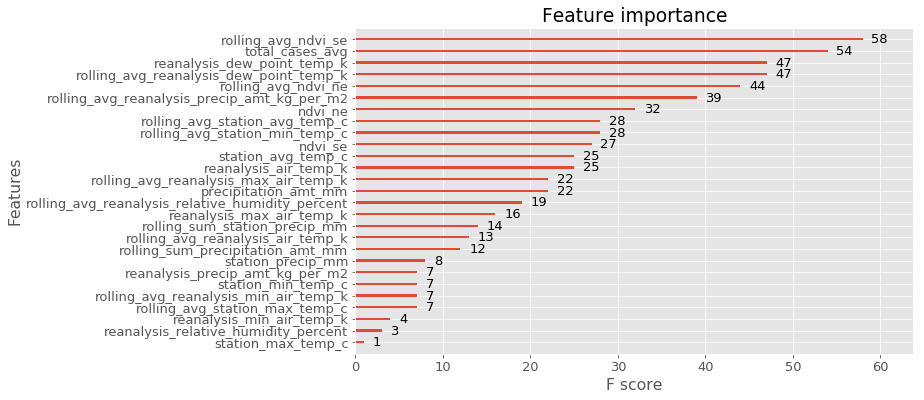

In [35]:
plot_importance(xgb)
pyplot.show()

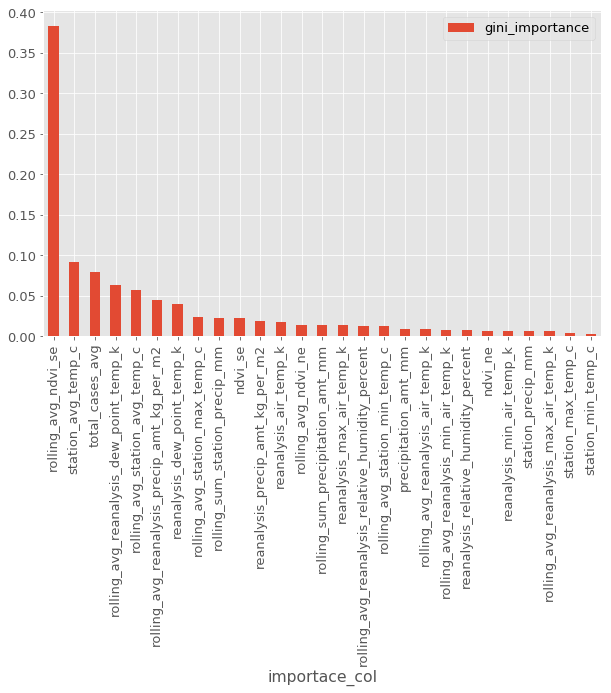

In [36]:
# feature importance using Random forest
X = df1_sj_train[features1]
Y = df1_sj_train['total_cases']
rf = RandomForestRegressor(n_estimators = 20, random_state = 0)
rf.fit(X, Y)

tmp=pd.DataFrame(list(zip(X.columns, rf.feature_importances_)),columns=['importace_col','gini_importance'])
tmp.sort_values(by=['gini_importance'],inplace=True,ascending=False)
tmp.plot(kind='bar',y='gini_importance',x='importace_col',sort_columns=True,)

#list(tmp.importace_col)

## Model comparison 

- we compare different model with negative mean absolute error and will chose final base on performance of the model

In [37]:
# model comparisons for San Juan 

from sklearn.model_selection import cross_val_score

X = df1_sj_train[features1]
Y = df1_sj_train['total_cases']

models = [
    RandomForestRegressor(n_estimators = 20, random_state = 0),
    XGBRegressor(n_estimators=20,),
    GradientBoostingRegressor(n_estimators=20),
    ElasticNet(),
    LinearSVR()
]

entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X, Y, scoring='neg_mean_absolute_error')
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'neg_mean_absolute_error'])
#cv_df

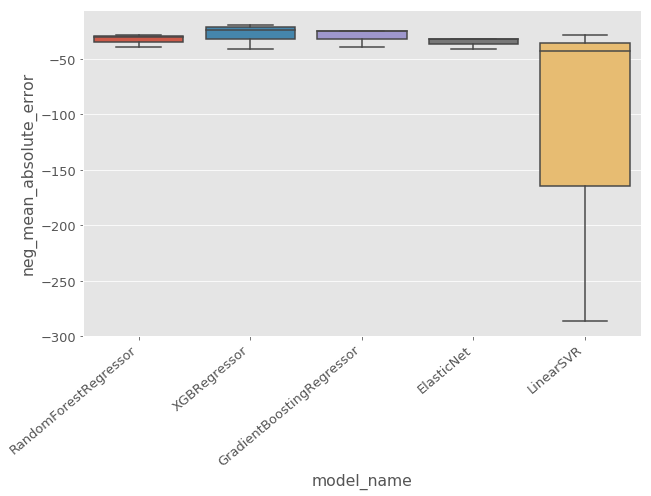

In [38]:
# box plot for model comparisons 
ax=sns.boxplot(x='model_name', y='neg_mean_absolute_error', data=cv_df)
ax.set(xlabel='model_name', ylabel='neg_mean_absolute_error')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()


In [39]:
# model comparisons for Iquitos

from sklearn.model_selection import cross_val_score

X = df1_iq_train[features1]
Y = df1_iq_train['total_cases']

models = [
    RandomForestRegressor(n_estimators = 20, random_state = 0),
    XGBRegressor(n_estimators=20,),
    GradientBoostingRegressor(n_estimators=20),
    ElasticNet(),
    LinearSVR()
]

entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X, Y, scoring='neg_mean_absolute_error')
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'neg_mean_absolute_error'])
#cv_df

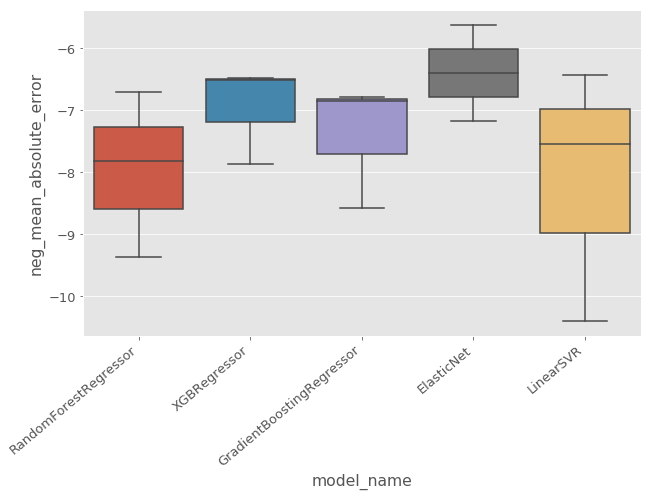

In [40]:
# box plot for model comparisons 
ax=sns.boxplot(x='model_name', y='neg_mean_absolute_error', data=cv_df)
ax.set(xlabel='model_name', ylabel='neg_mean_absolute_error')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

## Hyper parameter tuning for ElasticNet Model

- from model comparison , we see that Elastic net and XGB performs better than other. I chose elastic net for simplicity and tune the hyperparameters. 

In [41]:
# perform gridsearch for hyperparameter tuning for Elastic Net 

# San Juan 

from sklearn.model_selection import GridSearchCV
import time as time
import numpy as np

#train_size = 100
X = df1_sj_train[features1]
Y = df1_sj_train['total_cases']


param={"alpha": np.arange(0.05,1,0.1),"l1_ratio": np.arange(0,1,0.1)}
#svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1), cv=5,param_grid=param)
#svr = GridSearchCV(ElasticNet(random_state=1),cv=5,param_grid=param)
svr = GridSearchCV(ElasticNet(random_state=1),cv=5,param_grid=param)


t0 = time.time()
svr.fit(X,Y)
svr_fit = time.time() - t0
print("SVR complexity and bandwidth selected and model fitted in %.3f s"
      % svr_fit)

model_svr_sj=svr.best_estimator_
model_svr_sj
model_svr_sj.fit(X,Y)


SVR complexity and bandwidth selected and model fitted in 5.082 s


ElasticNet(alpha=0.5500000000000002, copy_X=True, fit_intercept=True,
      l1_ratio=0.9, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=1, selection='cyclic', tol=0.0001,
      warm_start=False)

In [42]:
# perform gridsearch on Elastic Net regressor
# Iquitos

X = df1_iq_train[features1]
Y = df1_iq_train['total_cases']

param={"alpha": np.arange(0.05,1,0.1),"l1_ratio": np.arange(0,1,0.1)}
#svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1), cv=5,param_grid=param)
svr = GridSearchCV(ElasticNet(random_state=1),cv=5,param_grid=param)

t0 = time.time()
svr.fit(X,Y)
svr_fit = time.time() - t0
print("SVR complexity and bandwidth selected and model fitted in %.3f s"
      % svr_fit)

model_svr_iq=svr.best_estimator_
model_svr_iq
model_svr_iq.fit(X,Y)

SVR complexity and bandwidth selected and model fitted in 3.091 s


ElasticNet(alpha=0.9500000000000002, copy_X=True, fit_intercept=True,
      l1_ratio=0.9, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=1, selection='cyclic', tol=0.0001,
      warm_start=False)

## First stage Prediction and visualization

- training data 
- test data

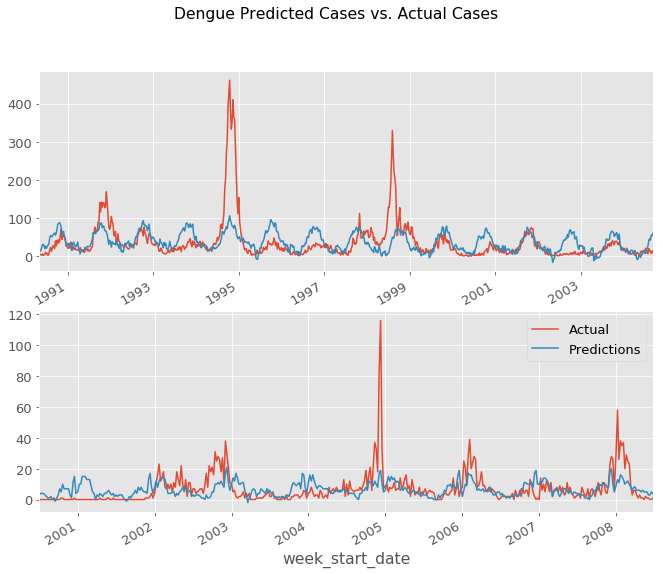

In [43]:
# training data 
preds_sj_svr= model_svr_sj.predict(df1_sj_train[features1]).astype(int)
preds_iq_svr=model_svr_iq.predict(df1_iq_train[features1]).astype(int)

df1_sj_train['predict'] = preds_sj_svr
df1_iq_train['predict'] = preds_iq_svr

### reset axis
df1_sj_train.index = df1_sj_train['week_start_date']
df1_iq_train.index = df1_iq_train['week_start_date']

# plot and compare prediction vs actual
figs, axes = plt.subplots(nrows=2, ncols=1, figsize=(11, 9))
df1_sj_train.total_cases.plot(ax=axes[0], label="Actual")
df1_sj_train.predict.plot(ax=axes[0], label="Predictions")

df1_iq_train.total_cases.plot(ax=axes[1], label="Actual")
df1_iq_train.predict.plot(ax=axes[1], label="Predictions")

plt.suptitle("Dengue Predicted Cases vs. Actual Cases")
plt.legend()

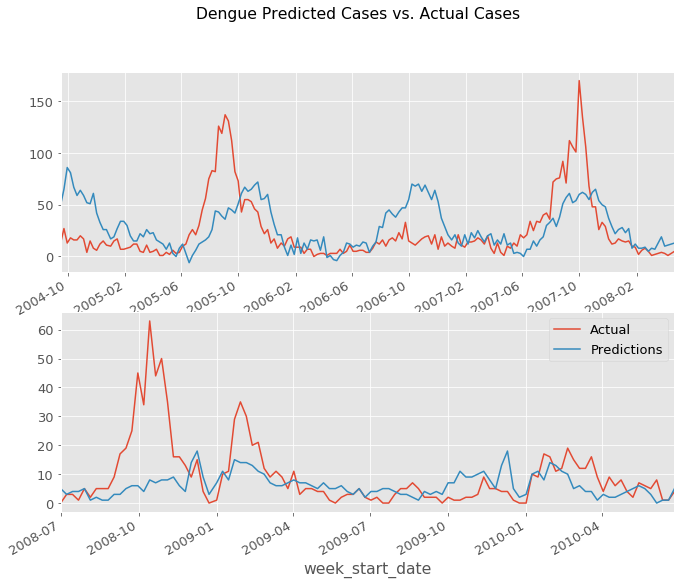

In [44]:
# test prediction

preds_sj_svr= model_svr_sj.predict(df1_sj_test[features1]).astype(int)
preds_iq_svr=model_svr_iq.predict(df1_iq_test[features1]).astype(int)

df1_sj_test['predict'] = preds_sj_svr
df1_iq_test['predict'] = preds_iq_svr

### reset axis
df1_sj_test.index = df1_sj_test['week_start_date']
df1_iq_test.index = df1_iq_test['week_start_date']

# plot and compare prediction vs actual
figs, axes = plt.subplots(nrows=2, ncols=1, figsize=(11, 9))
df1_sj_test.total_cases.plot(ax=axes[0], label="Actual")
df1_sj_test.predict.plot(ax=axes[0], label="Predictions")

df1_iq_test.total_cases.plot(ax=axes[1], label="Actual")
df1_iq_test.predict.plot(ax=axes[1], label="Predictions")

plt.suptitle("Dengue Predicted Cases vs. Actual Cases")
plt.legend()

## First stage prediction on test data (unseen data)

- Here we used the first stage train model and predicted total cases for unseen data(test data). We also use this prediction as the next stage feature. 

In [45]:
# first stage data prep for test data set

tmp=selected_col1.copy()
del tmp[-1]
# filtered colum using correlation
test=testdata[tmp]
#convert in date time  datetime
test['week_start_date']=pd.to_datetime(test['week_start_date'])
#extract month to new column
test['month']=test.week_start_date.dt.month
test=test.join(df1.groupby(['city','weekofyear'])['total_cases'].mean(), on=['city','weekofyear'], rsuffix='_avg')
test.rename(columns={'total_cases': 'total_cases_avg'}, inplace=True)
test.head()

# final test data
test_sj=test[test['city']=='sj']
test_iq=test[test['city']=='iq']

# rolling sum
rolling_cols_sum=[
 'precipitation_amt_mm',
 'station_precip_mm'
]

#rolling average
rolling_cols_avg=[
 'ndvi_ne',
 'ndvi_se',
 'reanalysis_air_temp_k',
 'reanalysis_dew_point_temp_k',
 'reanalysis_max_air_temp_k',
 'reanalysis_min_air_temp_k',
 'reanalysis_precip_amt_kg_per_m2',
 'reanalysis_relative_humidity_percent',
 'station_avg_temp_c',
 'station_max_temp_c',
 'station_min_temp_c'
]


# San Juan
# take the sum of prior two week
for col in rolling_cols_sum:
    test_sj['rolling_sum_'+col] = test_sj[[str(col)]].rolling(window=3,center=False).sum()

#takes the avg of prior 2 weeks
for col in rolling_cols_avg:
    test_sj['rolling_avg_'+col] = test_sj[[str(col)]].rolling(window=3,center=False).mean()


#Iquitos
# take the sum of prior two week
for col in rolling_cols_sum:
    test_iq['rolling_sum_'+col] = test_iq[[str(col)]].rolling(window=3,center=False).sum()

#takes the avg of prior 2 weeks
for col in rolling_cols_avg:
    test_iq['rolling_avg_'+col] = test_iq[[str(col)]].rolling(window=3,center=False).mean()


#fill resulting NaNs from the lag functions
test_sj.fillna(method='bfill', inplace=True)
test_iq.fillna(method='bfill', inplace=True)


# test_sj.columns
features1=['ndvi_ne','ndvi_se',
       'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k',
       'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'station_avg_temp_c',
       'station_max_temp_c', 'station_min_temp_c', 'station_precip_mm',
       'total_cases_avg','rolling_sum_precipitation_amt_mm', 'rolling_sum_station_precip_mm',
       'rolling_avg_ndvi_ne','rolling_avg_ndvi_se',
       'rolling_avg_reanalysis_air_temp_k',
       'rolling_avg_reanalysis_dew_point_temp_k',
       'rolling_avg_reanalysis_max_air_temp_k',
       'rolling_avg_reanalysis_min_air_temp_k',
       'rolling_avg_reanalysis_precip_amt_kg_per_m2',
       'rolling_avg_reanalysis_relative_humidity_percent',
       'rolling_avg_station_avg_temp_c', 'rolling_avg_station_max_temp_c',
       'rolling_avg_station_min_temp_c']

# feature importance using randomforest/XGBM
#test_sj[features1]
#test_iq[features1]

## Create first stage output

In [46]:
# first stage test prediction
preds_sj_svr = model_svr_sj.predict(test_sj[features1]).astype(float)
preds_iq_svr = model_svr_iq.predict(test_iq[features1]).astype(float)

test_submission = pd.read_csv("DengAI_Predicting_Disease_Spread_-_Submission_Format.csv",index_col=[0, 1, 2])
test_submission.total_cases = np.concatenate([preds_sj_svr, preds_iq_svr])
test_submission.to_csv("first_stage_result_submission.csv")

In [47]:
#add a total cases column to the test dataframe
test1 = pd.concat([test_sj, test_iq])
test1['pred_total_cases'] = np.concatenate([preds_sj_svr, preds_iq_svr])
test1.head()

city week_start_date  year  weekofyear  ndvi_ne   ndvi_se  \
0   sj      2008-04-29  2008          18  -0.0189  0.102729   
1   sj      2008-05-06  2008          19  -0.0180  0.082043   
2   sj      2008-05-13  2008          20  -0.0015  0.151083   
3   sj      2008-05-20  2008          21  -0.0015  0.124329   
4   sj      2008-05-27  2008          22   0.0568  0.062267   

   precipitation_amt_mm  reanalysis_air_temp_k  reanalysis_dew_point_temp_k  \
0                 78.60             298.492857                   294.527143   
1                 12.56             298.475714                   294.395714   
2                  3.66             299.455714                   295.308571   
3                  0.00             299.690000                   294.402857   
4                  0.76             299.780000                   294.760000   

   reanalysis_max_air_temp_k  reanalysis_min_air_temp_k  \
0                      301.1                      296.4   
1                      300.8                      296.7   
2                      302.2                      296.4   
3                      303.0                      296.9   
4                      302.3                      297.3   

   reanalysis_precip_amt_kg_per_m2  reanalysis_relative_humidity_percent  \
0                            25.37                             78.781429   
1                            21.83                             78.230000   
2                             4.12                             78.270000   
3                             2.20                             73.015714   
4                             4.36                             74.084286   

   station_avg_temp_c  station_max_temp_c  station_min_temp_c  \
0           26.528571                33.3                21.7   
1           26.071429                30.0                22.2   
2           27.928571                32.8                22.8   
3           28.057143                33.3                24.4   
4           27.614286                33.3                23.3   

   station_precip_mm  month  total_cases_avg  \
0               75.2      4        10.722222   
1               34.3      5         9.944444   
2                3.0      5        11.500000   
3                0.3      5        11.166667   
4               84.1      5        13.777778   

   rolling_sum_precipitation_amt_mm  rolling_sum_station_precip_mm  \
0                             94.82                          112.5   
1                             94.82                          112.5   
2                             94.82                          112.5   
3                             16.22                           37.6   
4                              4.42                           87.4   

   rolling_avg_ndvi_ne  rolling_avg_ndvi_se  \
0            -0.012800             0.111952   
1            -0.012800             0.111952   
2            -0.012800             0.111952   
3            -0.007000             0.119152   
4             0.017933             0.112560   

   rolling_avg_reanalysis_air_temp_k  rolling_avg_reanalysis_dew_point_temp_k  \
0                         298.808095                               294.743810   
1                         298.808095                               294.743810   
2                         298.808095                               294.743810   
3                         299.207143                               294.702381   
4                         299.641905                               294.823810   

   rolling_avg_reanalysis_max_air_temp_k  \
0                             301.366667   
1                             301.366667   
2                             301.366667   
3                             302.000000   
4                             302.500000   

   rolling_avg_reanalysis_min_air_temp_k  \
0                             296.500000   
1                             296.500000   
2                             296.500000   
3                       

# Second stage model

### create more features 
- we account previous week dengue cases for prediction using moving average and autoregression.

In [48]:
# value from previous week
# use in second stage prediction
# creating ARIMA(lag columns) and moving average(rolling) features using target columns 

#train
df1_sj['cases_prev_wk1'] = df1_sj['total_cases'].shift(1)
df1_iq['cases_prev_wk1'] = df1_iq['total_cases'].shift(1)

df1_sj['cases_prev_wk2'] = df1_sj['total_cases'].shift(2)
df1_iq['cases_prev_wk2'] = df1_iq['total_cases'].shift(2)
# adding moving average of prediction
df1_sj['total_cases_mw2']=df1_sj['total_cases'].rolling(window=2,center=False).mean()
df1_iq['total_cases_mw2']=df1_iq['total_cases'].rolling(window=2,center=False).mean()


#test

test1_sj=test1[test1['city']=='sj']
test1_iq=test1[test1['city']=='iq']

test1_sj['cases_prev_wk1'] = test1_sj['pred_total_cases'].shift(1)
test1_iq['cases_prev_wk1'] = test1_iq['pred_total_cases'].shift(1)

test1_sj['cases_prev_wk2'] = test1_sj['pred_total_cases'].shift(2)
test1_iq['cases_prev_wk2'] = test1_iq['pred_total_cases'].shift(2)
# adding moving average of prediction
test1_sj['total_cases_mw2']=test1_sj['pred_total_cases'].rolling(window=2,center=False).mean()
test1_iq['total_cases_mw2']=test1_iq['pred_total_cases'].rolling(window=2,center=False).mean()


#need to make sure no NaNs added when creating moving avg or getting previous week values
#bfill use NEXT valid observation to fill gap
df1_sj.fillna(method='bfill', inplace=True)
df1_iq.fillna(method='bfill', inplace=True)

test1_sj.fillna(method='bfill', inplace=True)
test1_iq.fillna(method='bfill', inplace=True)


In [49]:
# selecting features for model
features2=['ndvi_ne', 'ndvi_se',
       'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k',
       'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'station_avg_temp_c',
       'station_max_temp_c', 'station_min_temp_c', 'station_precip_mm',
       'month', 'total_cases_avg',
       'rolling_sum_precipitation_amt_mm', 'rolling_sum_station_precip_mm',
       'rolling_avg_ndvi_ne', 'rolling_avg_ndvi_se',
       'rolling_avg_reanalysis_air_temp_k',
       'rolling_avg_reanalysis_dew_point_temp_k',
       'rolling_avg_reanalysis_max_air_temp_k',
       'rolling_avg_reanalysis_min_air_temp_k',
       'rolling_avg_reanalysis_precip_amt_kg_per_m2',
       'rolling_avg_reanalysis_relative_humidity_percent',
       'rolling_avg_station_avg_temp_c', 'rolling_avg_station_max_temp_c',
       'rolling_avg_station_min_temp_c', 'cases_prev_wk1','cases_prev_wk2','total_cases_mw2']

In [50]:
# Splitting train and test data from train 

train_size = int(df1_sj.shape[0] * 0.80)
df1_sj_train, df1_sj_test = df1_sj[0:train_size], df1_sj[train_size:df1_sj.shape[0]]

train_size = int(df1_iq.shape[0] * 0.80)
df1_iq_train, df1_iq_test = df1_iq[0:train_size], df1_iq[train_size:df1_iq.shape[0]]

# Train 
X_sj_train = df1_sj_train[features2]
Y_sj_train = df1_sj_train['total_cases']

# Test
X_iq_test = df1_sj_test[features2]
Y_iq_test = df1_sj_test['total_cases']


In [51]:
# data preparation from final test data ( unseen data)
# TEST
X_sj_t= test1_sj[features2]
X_iq_t= test1_iq[features2]

## Model Comparison second stage 
- In this stage we used the dengue counts from previous 2 weeks as a feature,  which were predicted in first stage model. This is also called autoregressive approach. 

In [52]:
# Model comparison
# San Juan 
X = df1_sj_train[features2]
Y = df1_sj_train['total_cases']

models = [
    RandomForestRegressor(n_estimators = 20, random_state = 0),
    XGBRegressor(n_estimators=20,),
    GradientBoostingRegressor(n_estimators=20),
    ElasticNet(),
    LinearSVR()
]

entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X, Y, scoring='neg_mean_absolute_error')
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'neg_mean_absolute_error'])
#cv_df

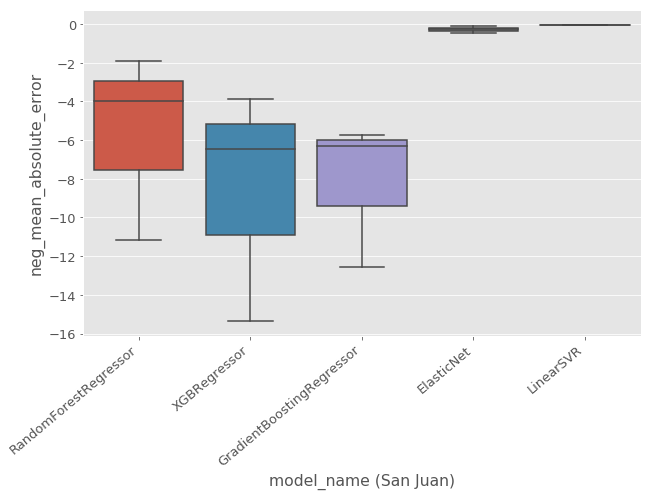

In [53]:
# box plot for model comparison
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax=sns.boxplot(x='model_name', y='neg_mean_absolute_error', data=cv_df)
ax.set(xlabel='model_name (San Juan)', ylabel='neg_mean_absolute_error')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
#ax.savefig("images/model_comparisons_SanJuan.png")
plt.show()
figure = ax.get_figure()    
figure.savefig('images/model_comparisons_SanJuan.png',bbox_inches = 'tight')


In [54]:
# Model creation
#Iquitos

X = df1_iq_train[features2]
Y = df1_iq_train['total_cases']

models = [
    RandomForestRegressor(n_estimators = 20, random_state = 0),
    XGBRegressor(n_estimators=20,),
    GradientBoostingRegressor(n_estimators=20),
    ElasticNet(),
    LinearSVR()
]

entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X, Y, scoring='neg_mean_absolute_error')
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'neg_mean_absolute_error'])
#cv_df

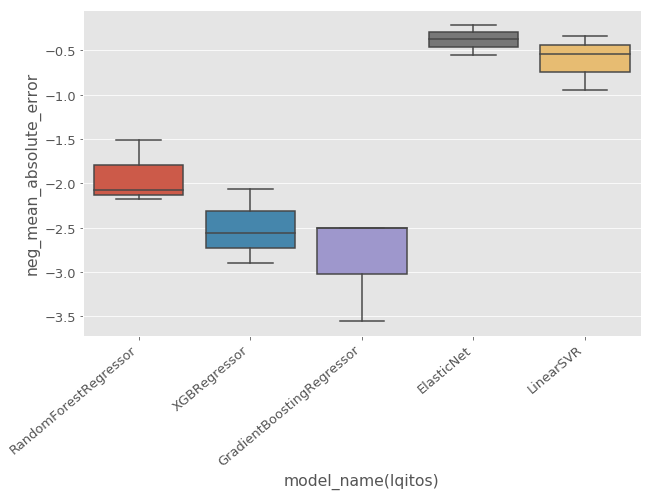

In [55]:
# box plot for model comparisons 
ax=sns.boxplot(x='model_name', y='neg_mean_absolute_error', data=cv_df)
ax.set(xlabel='model_name(Iqitos)', ylabel='neg_mean_absolute_error')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

figure = ax.get_figure()    
figure.savefig('images/model_comparisons_Iqitos.png',bbox_inches = 'tight')



# Hyperparameter tuning and model creation for the second stage

- We finalized ElasticNet for our model and tune the parameters with grid search. Here, I also could use GBR or XGB. If time permitted then it would be possible to explore effect of individual features and tune model for more accuracy. 

In [56]:
# perform gridsearch with Elastic Net regressor
# San Juan

#train_size = 100
X = df1_sj_train[features2]
Y = df1_sj_train['total_cases']


param={"alpha": np.arange(0.05,1,0.1),"l1_ratio": np.arange(0,1,0.1)}
#svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1), cv=5,param_grid=param)
#svr = GridSearchCV(ElasticNet(random_state=1),cv=5,param_grid=param)
svr = GridSearchCV(ElasticNet(random_state=1),cv=5,param_grid=param)


t0 = time.time()
svr.fit(X,Y)
svr_fit = time.time() - t0
print("SVR complexity and bandwidth selected and model fitted in %.3f s"
      % svr_fit)

model_svr_sj=svr.best_estimator_
model_svr_sj
model_svr_sj.fit(X,Y)


SVR complexity and bandwidth selected and model fitted in 5.142 s


ElasticNet(alpha=0.15000000000000002, copy_X=True, fit_intercept=True,
      l1_ratio=0.0, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=1, selection='cyclic', tol=0.0001,
      warm_start=False)

In [57]:
# perform gridsearch with Elastic Net regressor
# Iquitos 

X = df1_iq_train[features2]
Y = df1_iq_train['total_cases']

param={"alpha": np.arange(0.05,1,0.1),"l1_ratio": np.arange(0,1,0.1)}
#svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1), cv=5,param_grid=param)
svr = GridSearchCV(ElasticNet(random_state=1),cv=5,param_grid=param)

t0 = time.time()
svr.fit(X,Y)
svr_fit = time.time() - t0
print("SVR complexity and bandwidth selected and model fitted in %.3f s"
      % svr_fit)

model_svr_iq=svr.best_estimator_
model_svr_iq
model_svr_iq.fit(X,Y)

SVR complexity and bandwidth selected and model fitted in 3.865 s


ElasticNet(alpha=0.05, copy_X=True, fit_intercept=True, l1_ratio=0.9,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=1, selection='cyclic', tol=0.0001, warm_start=False)

# Prediction with the second stage model 

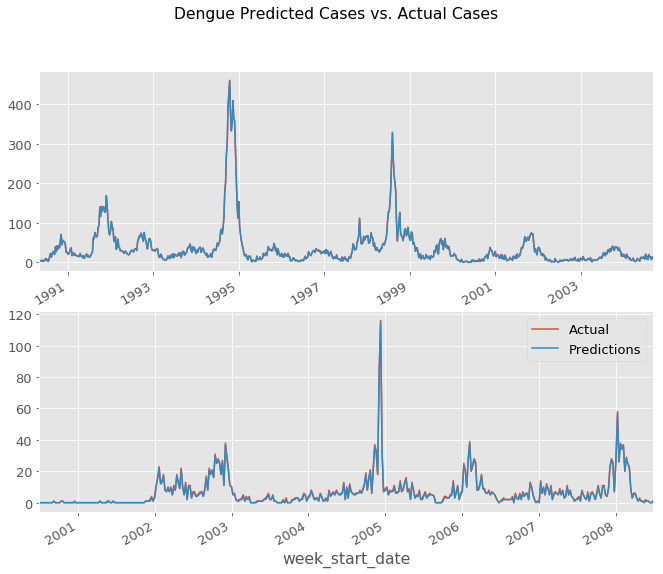

In [58]:
preds_sj_svr= model_svr_sj.predict(df1_sj_train[features2]).astype(int)
preds_iq_svr=model_svr_iq.predict(df1_iq_train[features2]).astype(int)

df1_sj_train['predict'] = preds_sj_svr
df1_iq_train['predict'] = preds_iq_svr

### reset axis
df1_sj_train.index = df1_sj_train['week_start_date']
df1_iq_train.index = df1_iq_train['week_start_date']

# plot and compare prediction vs actual
figs, axes = plt.subplots(nrows=2, ncols=1, figsize=(11, 9))
df1_sj_train.total_cases.plot(ax=axes[0], label="Actual")
df1_sj_train.predict.plot(ax=axes[0], label="Predictions")

df1_iq_train.total_cases.plot(ax=axes[1], label="Actual")
df1_iq_train.predict.plot(ax=axes[1], label="Predictions")

plt.suptitle("Dengue Predicted Cases vs. Actual Cases")
plt.legend()

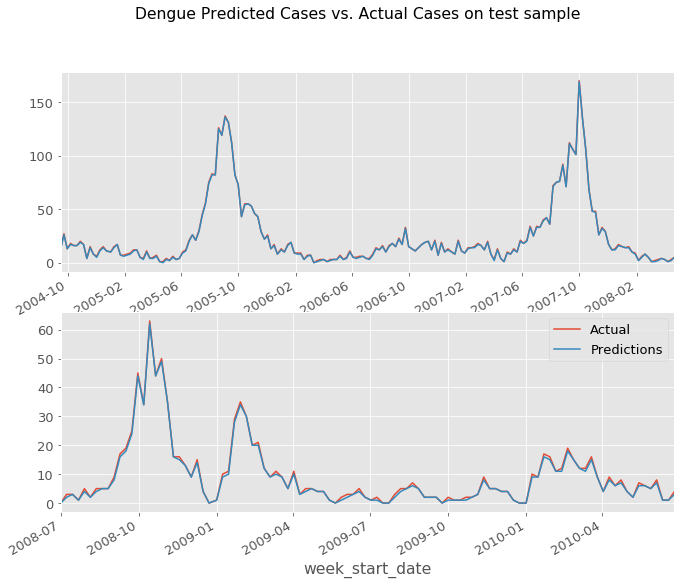

In [59]:
## Prediction on Test data
# test prediction

preds_sj_svr= model_svr_sj.predict(df1_sj_test[features2]).astype(int)
preds_iq_svr=model_svr_iq.predict(df1_iq_test[features2]).astype(int)

df1_sj_test['predict'] = preds_sj_svr
df1_iq_test['predict'] = preds_iq_svr

### reset axis
df1_sj_test.index = df1_sj_test['week_start_date']
df1_iq_test.index = df1_iq_test['week_start_date']

# plot and compare prediction vs actual
figs, axes = plt.subplots(nrows=2, ncols=1, figsize=(11, 9))
df1_sj_test.total_cases.plot(ax=axes[0], label="Actual")
df1_sj_test.predict.plot(ax=axes[0], label="Predictions")

df1_iq_test.total_cases.plot(ax=axes[1], label="Actual")
df1_iq_test.predict.plot(ax=axes[1], label="Predictions")

plt.suptitle("Dengue Predicted Cases vs. Actual Cases on test sample")
plt.legend()
plt.savefig('images/actual_vs_prediction_for test_sample.png')

# Final test prediction and preparing data for submission

In [60]:
# data preparation from final test data
# TEST
X_sj_t= test1_sj[features2]
X_iq_t= test1_iq[features2]

#predict for each city using test set
sj_predictions = model_svr_sj.predict(X_sj_t).astype(int)
iq_predictions = model_svr_iq.predict(X_iq_t).astype(int)


In [61]:
#read in the driven data submission example and add the predictions

df_submission_final = pd.read_csv("DengAI_Predicting_Disease_Spread_-_Submission_Format.csv",index_col=[0, 1, 2])
df_submission_final['total_cases'] = np.concatenate([sj_predictions, iq_predictions])
df_submission_final.to_csv("DengueAI_prediction_2stage.csv")

- The model scored at 25.89 MAE with this submission. If time permitted, it would be possible to further tune the model and perform feature engineering to improve accuracy and, therefore, score.